# CS148 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [29]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [30]:
data = pd.read_csv("heartdisease.csv")

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [31]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [32]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problemmatic and why?

The data is mostly numerical, so there would be not much problem to fit our model. However, the sick label is boolean, but this is not a big problem since boolean can easily be converted to numerical.

### Determine if we're dealing with any null values. If so, report on which columns? 

In [33]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

There is no null values.

### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [34]:
data.sick = data.sick.astype(int)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? 

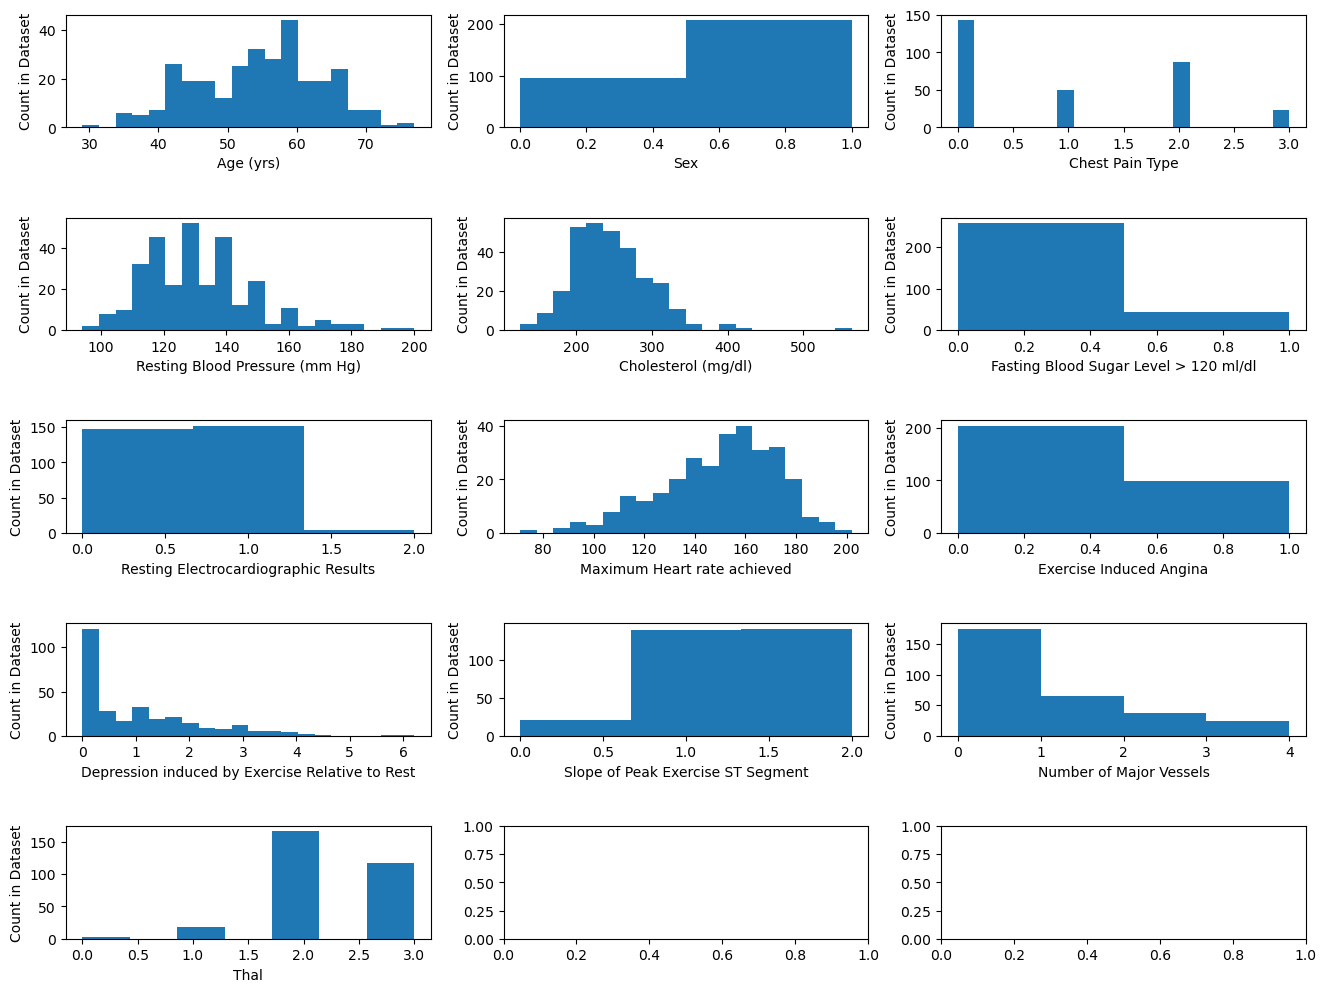

In [35]:
f, a = plt.subplots(5, 3)

a[0,0].hist(data["age"], bins=20)
a[0,0].set_xlabel("Age (yrs)")
a[0,0].set_ylabel("Count in Dataset")

a[0,1].hist(data["sex"], bins=2)
a[0,1].set_xlabel("Sex")
a[0,1].set_ylabel("Count in Dataset")

a[0, 2].hist(data["cp"], bins=20)
a[0, 2].set_xlabel("Chest Pain Type")
a[0, 2].set_ylabel("Count in Dataset")

a[1, 0].hist(data["trestbps"], bins=20)
a[1, 0].set_xlabel("Resting Blood Pressure (mm Hg)")
a[1, 0].set_ylabel("Count in Dataset")

a[1, 1].hist(data["chol"], bins=20)
a[1, 1].set_xlabel("Cholesterol (mg/dl)")
a[1, 1].set_ylabel("Count in Dataset")

a[1, 2].hist(data["fbs"], bins=2)
a[1, 2].set_xlabel("Fasting Blood Sugar Level > 120 ml/dl")
a[1, 2].set_ylabel("Count in Dataset")

a[2, 0].hist(data["restecg"], bins=3)
a[2, 0].set_xlabel("Resting Electrocardiographic Results")
a[2, 0].set_ylabel("Count in Dataset")

a[2, 1].hist(data["thalach"], bins=20)
a[2, 1].set_xlabel("Maximum Heart rate achieved")
a[2, 1].set_ylabel("Count in Dataset")

a[2, 2].hist(data["exang"], bins=2)
a[2, 2].set_xlabel("Exercise Induced Angina")
a[2, 2].set_ylabel("Count in Dataset")

a[3, 0].hist(data["oldpeak"], bins=20)
a[3, 0].set_xlabel("Depression induced by Exercise Relative to Rest")
a[3, 0].set_ylabel("Count in Dataset")

a[3, 1].hist(data["slope"], bins=3)
a[3, 1].set_xlabel("Slope of Peak Exercise ST Segment")
a[3, 1].set_ylabel("Count in Dataset")

a[3, 2].hist(data["ca"], bins=4)
a[3, 2].set_xlabel("Number of Major Vessels")
a[3, 2].set_ylabel("Count in Dataset")

a[4, 0].hist(data["thal"], bins=7)
a[4, 0].set_xlabel("Thal")
a[4, 0].set_ylabel("Count in Dataset")

f.set_figheight(12)
f.set_figwidth(16)
plt.subplots_adjust(hspace=0.8)
plt.show()

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

Number of healthy people: 165
Number of sick people: 138


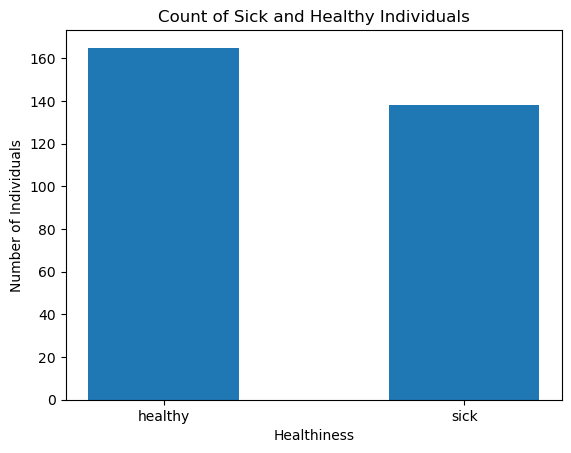

In [36]:
count_sick = data[data["sick"] == 1].shape[0]
count_healthy = data[data["sick"] == 0].shape[0]
plt.bar(x=["healthy", "sick"], height=[count_healthy, count_sick], width=0.5)
plt.title("Count of Sick and Healthy Individuals")
plt.xlabel("Healthiness")
plt.ylabel("Number of Individuals")
print("Number of healthy people: {}".format(count_healthy))
print("Number of sick people: {}".format(count_sick))

There are 165 healthy people and 138 sick people. The dataset is can be considered balanced since there is approximately equal number of people in both categories.

### Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

There are few ways to artificially balance the dataset. Downsampling is throwing out some samples from the category with more samples so that the categories are balanced, but this is throwing out the data that could be used. Another method is to synthetically generate the data for category with fewer samples, but the data generated might not represent the real data if the model is not strong enough, and it might not generate corner cases. 

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

<AxesSubplot:>

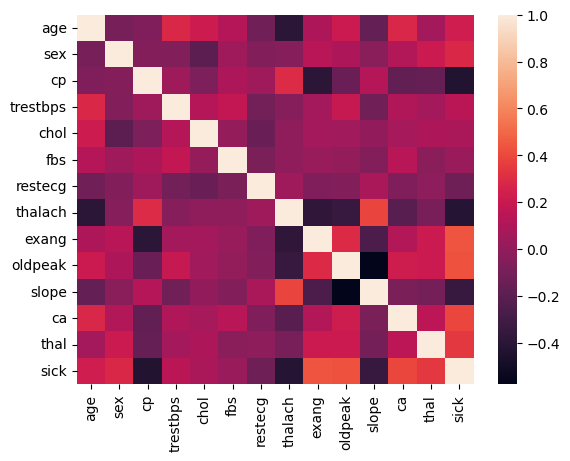

In [37]:
import seaborn as sns
sns.heatmap(data.corr(method="pearson"))

Positive Correlation

thalach vs slope

When slope decreases, blood was flowing back in to the heart when it was trying to pump blood out, and vice versa.

sick vs ca

More seen blood vessels might be correlated to blood vessels clotting, resulting sickness.

exang vs sick

As exercise angina is type of chest pain, it is correlated with sickness.

oldpeak vs sick

Increased ST depression could be a sign of blockaage of coronary artery in the heart, which may cause heart attack.

Negative Correlation
age vs trestbps, chol, sick, oldpeak

Resting blood pressure, cholesterol, likelihood of heart disease all increase with age.

sex vs chol, thalach, sick

Males tend to have higher cholesterol, heartrate, and more commonly diagnosed with heart disease.

## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe. 

In [38]:
if "sick" in data.columns:
    target = np.array(data["sick"])
    data = data.drop(columns=["sick"])

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [39]:
raw_X_train, raw_X_test, raw_y_train, raw_y_test = train_test_split(data, target, test_size=0.3, random_state=42)
print("raw_X_train: {} rows, {} columns.".format(raw_X_train.shape[0], raw_X_train.shape[1]))
print("raw_X_test: {} rows, {} columns.".format(raw_X_test.shape[0], raw_X_test.shape[1]))
print("raw_y_train: {} rows, 1 column.".format(raw_y_train.shape[0]))
print("raw_y_test: {} rows, 1 column.".format(raw_y_test.shape[0]))

raw_X_train: 212 rows, 13 columns.
raw_X_test: 91 rows, 13 columns.
raw_y_train: 212 rows, 1 column.
raw_y_test: 91 rows, 1 column.


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

Accuracy: 0.6593406593406593
Precision: 0.631578947368421
Recall: 0.5853658536585366
F1: 0.6075949367088608
Confusion Matrix: 
[[36 14]
 [17 24]]


c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


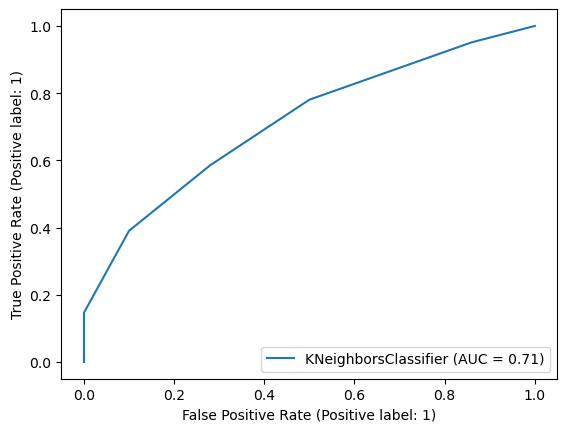

In [40]:
# k-Nearest Neighbors algorithm

knn_clf = KNeighborsClassifier()
knn_clf.fit(raw_X_train, raw_y_train)

knn_preds = knn_clf.predict(raw_X_test)

print("Accuracy: {}".format(metrics.accuracy_score(raw_y_test, knn_preds)))
print("Precision: {}".format(metrics.precision_score(raw_y_test, knn_preds)))
print("Recall: {}".format(metrics.recall_score(raw_y_test, knn_preds)))
print("F1: {}".format(metrics.f1_score(raw_y_test, knn_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(raw_y_test, knn_preds)))

metrics.plot_roc_curve(knn_clf, raw_X_test, raw_y_test)

### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

### Pipeline:

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# categorical: sex, cp, restecg, slope, thal
# boolean: fbs, exang
# numerical: age, trestbps, chol, thalach, oldpeak, ca

# Make dataframe with categorical features and numerical features
cat_columns = []
data_num = data.copy(deep=True)

num_columns = list(data_num.columns)
if "sex" in num_columns:
    data_num.drop(["sex"], axis=1, inplace=True)
    cat_columns.append("sex")

if "cp" in num_columns:
    data_num.drop(["cp"], axis=1, inplace=True)
    cat_columns.append("cp")

if "restecg" in num_columns:
    data_num.drop(["restecg"], axis=1, inplace=True)
    cat_columns.append("restecg")

if "slope" in num_columns:
    data_num.drop(["slope"], axis=1, inplace=True)
    cat_columns.append("slope")

if "thal" in num_columns:
    data_num.drop(["thal"], axis=1, inplace=True)
    cat_columns.append("thal")

if "fbs" in num_columns:
    data_num.drop(["fbs"], axis=1, inplace=True)

if "exang" in num_columns:
    data_num.drop(["exang"], axis=1, inplace=True)

In [42]:
# Pipeline my test data
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

num_columns = list(data_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_columns),
    ("cat", OneHotEncoder(categories="auto"), cat_columns),
])

data_prepared = full_pipeline.fit_transform(data)
data_prepared

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         0.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  0.        ,
         1.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         1.        ,  0.        ]])

### Now retrain your model and compare the accuracy metrics with the raw and pipelined data. 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_prepared, target, test_size=0.3, random_state=42)
print("X_train: {} rows, {} columns.".format(X_train.shape[0], X_train.shape[1]))
print("X_test: {} rows, {} columns.".format(X_test.shape[0], X_test.shape[1]))
print("y_train: {} rows, 1 column.".format(y_train.shape[0]))
print("y_test: {} rows, 1 column.".format(y_test.shape[0]))

X_train: 212 rows, 22 columns.
X_test: 91 rows, 22 columns.
y_train: 212 rows, 1 column.
y_test: 91 rows, 1 column.


Accuracy: 0.8241758241758241
Precision: 0.7906976744186046
Recall: 0.8292682926829268
F1: 0.8095238095238095
Confusion Matrix: 
[[41  9]
 [ 7 34]]


c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


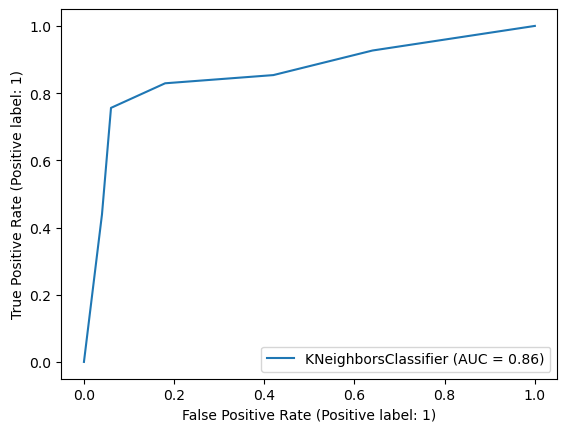

In [44]:
# k-Nearest Neighbors algorithm

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_preds = knn_clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, knn_preds)))
print("Precision: {}".format(metrics.precision_score(y_test, knn_preds)))
print("Recall: {}".format(metrics.recall_score(y_test, knn_preds)))
print("F1: {}".format(metrics.f1_score(y_test, knn_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, knn_preds)))

metrics.plot_roc_curve(knn_clf, X_test, y_test)

The dataset has extra columns as we fed the unprocessed data through the pipeline. This separates categorical features into boolean values.

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [45]:
n_values = [1, 2, 3, 5, 7, 10, 20, 50, 100]

for n in n_values:
    new_knn_clf = KNeighborsClassifier(n_neighbors=n)
    new_knn_clf.fit(X_train, y_train)

    new_knn_preds = new_knn_clf.predict(X_test)

    print("Scores for KNN with {} Neighbors".format(n))
    print("Accuracy: {}".format(metrics.accuracy_score(y_test, new_knn_preds)))
    print("Homogeneity score: {}".format(metrics.homogeneity_score(y_test, new_knn_preds)))
    print("Completeness score: {}".format(metrics.completeness_score(y_test, new_knn_preds)))
    print("V-Measure score: {}".format(metrics.v_measure_score(y_test, new_knn_preds)))
    print("Adjusted Rand Score score: {}".format(metrics.adjusted_rand_score(y_test, new_knn_preds)))
    print("Adjusted Mutual Information score: {}".format(metrics.adjusted_mutual_info_score(y_test, new_knn_preds)))
    print('\n')

Scores for KNN with 1 Neighbors
Accuracy: 0.7582417582417582
Homogeneity score: 0.20985098431317886
Completeness score: 0.20853140645344054
V-Measure score: 0.20918911440934143
Adjusted Rand Score score: 0.25859899503960326
Adjusted Mutual Information score: 0.20273603619785815


Scores for KNN with 2 Neighbors
Accuracy: 0.7472527472527473
Homogeneity score: 0.17861037960004397
Completeness score: 0.18315005279865285
V-Measure score: 0.1808517323867137
Adjusted Rand Score score: 0.23617238233242097
Adjusted Mutual Information score: 0.1740540051222724


Scores for KNN with 3 Neighbors
Accuracy: 0.7802197802197802
Homogeneity score: 0.2496425020846802
Completeness score: 0.2480727085491445
V-Measure score: 0.24885512975288338
Adjusted Rand Score score: 0.3064628280344115
Adjusted Mutual Information score: 0.24272572930559602


Scores for KNN with 5 Neighbors
Accuracy: 0.8241758241758241
Homogeneity score: 0.32939901704632263
Completeness score: 0.32778522042452185
V-Measure score: 0.328

c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

## Part 3. Additional Learning Methods 

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. 

### This time in addition to accuracy report metrics for: 
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



Accuracy: 0.8351648351648352
Precision: 0.8095238095238095
Recall: 0.8292682926829268
F1: 0.8192771084337348
Confusion Matrix: 
[[42  8]
 [ 7 34]]


c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


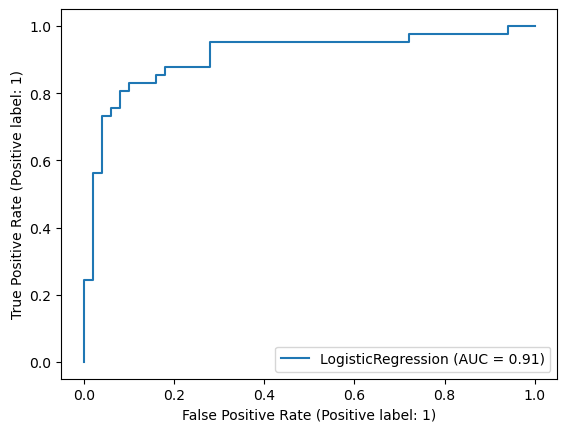

In [46]:
# Logistic Regression
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)

log_reg_preds = log_reg_clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, log_reg_preds)))
print("Precision: {}".format(metrics.precision_score(y_test, log_reg_preds)))
print("Recall: {}".format(metrics.recall_score(y_test, log_reg_preds)))
print("F1: {}".format(metrics.f1_score(y_test, log_reg_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, log_reg_preds)))

metrics.plot_roc_curve(log_reg_clf, X_test, y_test)

### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Accuracy: Percentage of predictions that were correct

Precision: percentage of positive cases that were correctly predicted as positive

Recall: percentage of positive predictions that were actually positive

F1: harmonic mean of precision and recall, and is used another measure for accuracy.

confusion matrix: the count of each type of classification that are made in test set.

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

Accuracy: 0.8351648351648352
Precision: 0.8095238095238095
Recall: 0.8292682926829268
F1: 0.8192771084337348
Confusion Matrix: 
[[42  8]
 [ 7 34]]


c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


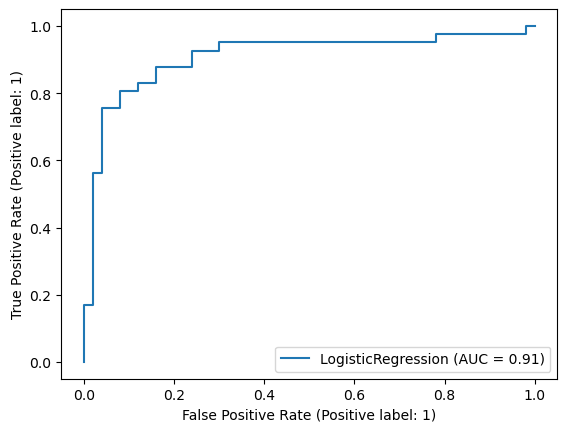

In [47]:
# Logistic Regression
log_reg_clf = LogisticRegression(random_state=42, solver="sag", penalty='none', max_iter=10)
log_reg_clf.fit(X_train, y_train)

log_reg_preds = log_reg_clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, log_reg_preds)))
print("Precision: {}".format(metrics.precision_score(y_test, log_reg_preds)))
print("Recall: {}".format(metrics.recall_score(y_test, log_reg_preds)))
print("F1: {}".format(metrics.f1_score(y_test, log_reg_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, log_reg_preds)))

metrics.plot_roc_curve(log_reg_clf, X_test, y_test)

### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

Accuracy: 0.8241758241758241
Precision: 0.8048780487804879
Recall: 0.8048780487804879
F1: 0.8048780487804877
Confusion Matrix: 
[[42  8]
 [ 8 33]]


c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


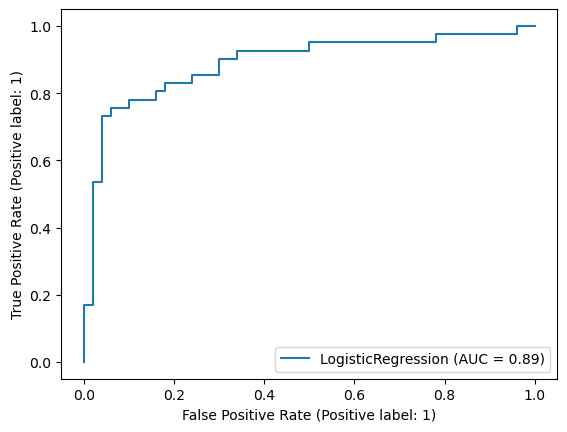

In [48]:
# Logistic Regression

new_log_reg_clf = LogisticRegression(random_state=42, solver="sag", penalty='none', max_iter=5000)
new_log_reg_clf.fit(X_train, y_train)

new_log_reg_preds = new_log_reg_clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, new_log_reg_preds)))
print("Precision: {}".format(metrics.precision_score(y_test, new_log_reg_preds)))
print("Recall: {}".format(metrics.recall_score(y_test, new_log_reg_preds)))
print("F1: {}".format(metrics.f1_score(y_test, new_log_reg_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, new_log_reg_preds)))

metrics.plot_roc_curve(new_log_reg_clf, X_test, y_test)

### Explain what you changed, and why do you think that may have altered the outcome. 

Changed max_iter parameter from 10 to 5000, which allows the solver to converge. 

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

Accuracy: 0.8351648351648352
Precision: 0.825
Recall: 0.8048780487804879
F1: 0.8148148148148149
Confusion Matrix: 
[[43  7]
 [ 8 33]]


c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


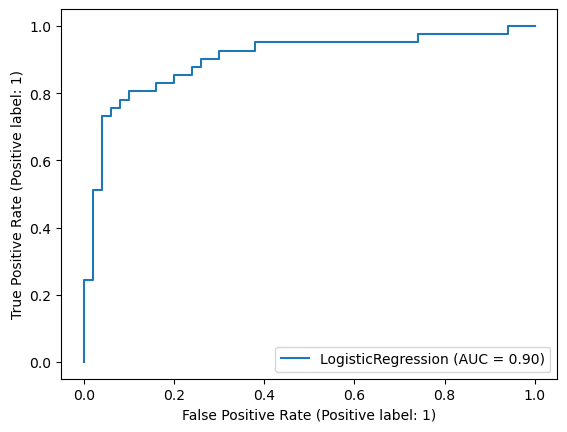

In [49]:
new2_log_reg_clf = LogisticRegression(random_state=42, solver="liblinear", penalty="l1", max_iter=5000)
new2_log_reg_clf.fit(X_train, y_train)

new2_log_reg_preds = new2_log_reg_clf.predict(X_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, new2_log_reg_preds)))
print("Precision: {}".format(metrics.precision_score(y_test, new2_log_reg_preds)))
print("Recall: {}".format(metrics.recall_score(y_test, new2_log_reg_preds)))
print("F1: {}".format(metrics.f1_score(y_test, new2_log_reg_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, new2_log_reg_preds)))

metrics.plot_roc_curve(new2_log_reg_clf, X_test, y_test)

### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!). 

sag solver optimizes the problem using maximum a posteriori estimation which allows to specify a prior distribution for the coefficients of the resulting model. liblinear uses a coordinate descent algorithm, which is based on minimizing a multivariate function by solving univariate optimization problems in a loop. For small datasets, 'liblinear' is a good choice, whereas 'sag' are faster for large datasets.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [50]:
# SVM
svm_raw_clf = SVC(probability=True, gamma="scale")
svm_raw_clf.fit(raw_X_train, raw_y_train)

SVC(probability=True)

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using the `from sklearn.metrics import plot_confusion_matrix` library for this one!


In [51]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

svm_raw_preds = svm_raw_clf.predict(raw_X_test)

In [52]:
print("Accuracy: {}".format(metrics.accuracy_score(raw_y_test, svm_raw_preds)))
print("Precision: {}".format(metrics.precision_score(raw_y_test, svm_raw_preds)))
print("Recall: {}".format(metrics.recall_score(raw_y_test, svm_raw_preds)))
print("F1: {}".format(metrics.f1_score(raw_y_test, svm_raw_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(raw_y_test, svm_raw_preds)))

Accuracy: 0.7032967032967034
Precision: 0.7916666666666666
Recall: 0.4634146341463415
F1: 0.5846153846153846
Confusion Matrix: 
[[45  5]
 [22 19]]


### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


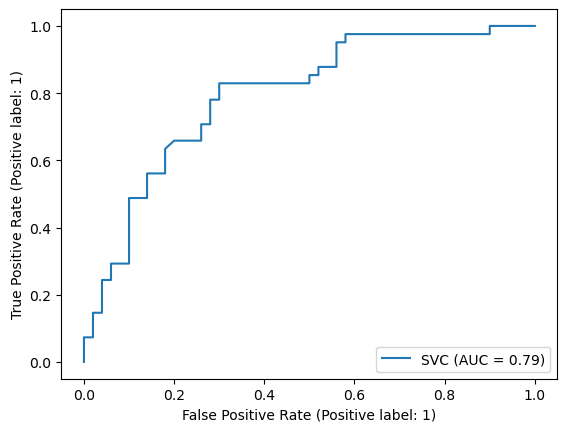

In [53]:
metrics.plot_roc_curve(svm_raw_clf, raw_X_test, raw_y_test)

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively low area under the curve indicating a poorly performing model.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [54]:
# SVM
svm_linear_clf = SVC(kernel="linear", probability=True, gamma="scale")
svm_linear_clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [55]:
svm_linear_preds = svm_linear_clf.predict(X_test)

Accuracy: 0.8241758241758241
Precision: 0.7906976744186046
Recall: 0.8292682926829268
F1: 0.8095238095238095
Confusion Matrix: 
[[41  9]
 [ 7 34]]


c:\Users\krwhlee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


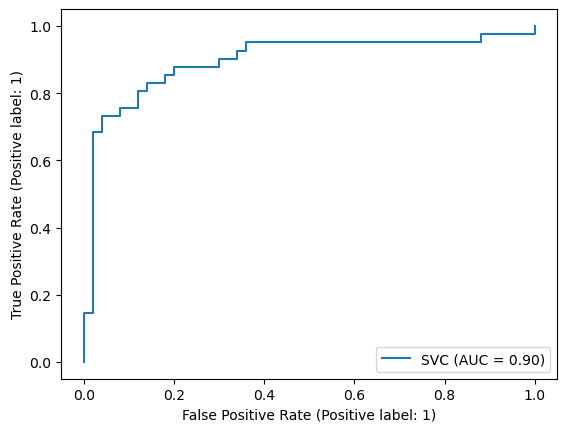

In [56]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, svm_linear_preds)))
print("Precision: {}".format(metrics.precision_score(y_test, svm_linear_preds)))
print("Recall: {}".format(metrics.recall_score(y_test, svm_linear_preds)))
print("F1: {}".format(metrics.f1_score(y_test, svm_linear_preds)))
print("Confusion Matrix: \n{}".format(metrics.confusion_matrix(y_test, svm_linear_preds)))

metrics.plot_roc_curve(svm_linear_clf, X_test, y_test)

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

Through changing the type to linear, it is changing the way of decision boundaries. The default parameter is rbf, which means the decision boundaries are determined by radial functions. Linear parameter means the boundaries are straight lines. linear kernel type performed worse in this case, but the performance varies by datasets.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic Regression is finds the linear decision boundary by deciding on a threshold for the probability score over a number of interations. SVM founds the boundary directly using least squares method.